# KBMod Analysis Demo

To run an analysis of KBMOD's output you need the results files. For the purposes of this notebook you can use that fake result data (corresponding to the `data/demo` images) included in `data/fake_results/*_DEMO.txt`.

If you would like to use real data, you can run KBMOD from start to finish you can use the following steps:

1) Run `example_search.py` with the following settings:

  * **image_dir**: The directory with the images from a single field. If you do not have an example data set, you can use `fake_data_creator.py` to create one.

  * **results_dir**: The directory where you want to save the results

  * **results_suffix**: Suffix to add when saving results files. Setting this as `test` then files will be saved as "..._test.txt". Five results files would be saved:
      * `lc_test.txt`: File with the light curves from results after going through Kalman Filter.
      * `results_test.txt`: File with the x,y pixel locations, velocity, flux, likelihood, and number of unmasked observations of each result.
      * `ps_test.txt`: File with the summed postage stamp for each result.
      * `times_test.txt`: File with the MJD of each observation in the saved lightcurve.
      * `filtered_likes_test.txt`: The recalculated likelihood values for each results after removing observations with the Kalman Filter.
  * **time_file**: [Optional] Location of a file with each row containing (visit_num, visit_mjd) for observations in dataset.
    
The command will be like the following:

```
python3 example_search.py --image_dir image_dir --results_dir results_dir --results_suffix test --time_file image_times.dat
```

2) Once you have the results you can use the steps in this notebook to create plots with postage stamps and lightcurves side-by-side for a final look by eye.
  You will first have to update some variables to match the arguments you chose for example_search.py in step 3.
  * Change results_dir to match `--results_dir option`.
  * Change results_suffix to match `--results_suffix option`.

In [1]:
# Directory where output from kbmod search are located
results_dir = "../data/fake_results/"
results_suffix = "DEMO"

In [2]:
import os
import numpy as np

from kbmod.analysis.plot_results import *
from kbmod.image_info import *
from kbmod.result_list import *

%matplotlib inline

## Loading Results

We load all of the result data as a `ResultList` and extract the first row to use for later examples.

In [3]:
results = load_result_list_from_files(results_dir, results_suffix)
print(f"Loaded {results.num_results()} results.")

row0 = results.results[0]

Loaded 1 results.


## Plotting the Results

We can use the `ResultsVisualizer` class to plot the different aspects of the `ResultList`.

We start by plotting the coadded stamp for the top result.

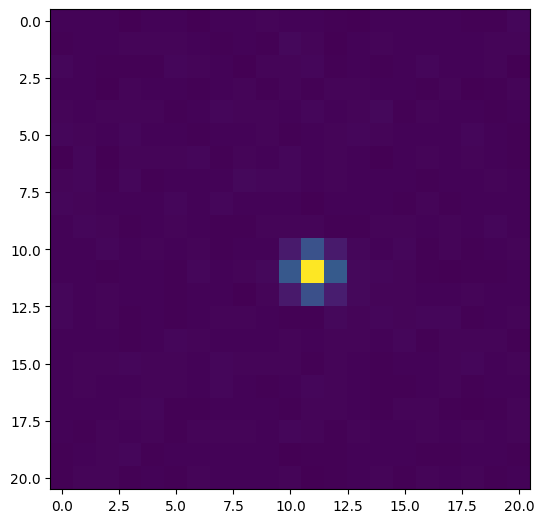

In [4]:
ResultsVisualizer.plot_single_stamp(row0.stamp)

If we have multiple stamps from either all_stamps or from multiple trajectories, we can plot them in a grid.

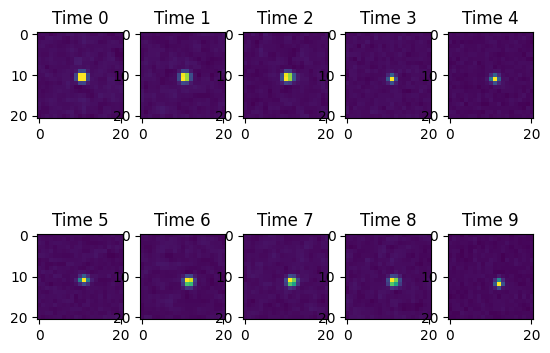

In [5]:
ResultsVisualizer.plot_stamps(row0.all_stamps, columns=5)

We can visualize the time series such as: `psi_curve`, `phi_curve`, or `light_curve` using the `plot_time_series` function. If we provide timestamps (such as with the top and bottom figure), they are used to both label the x-axis and set spacing.

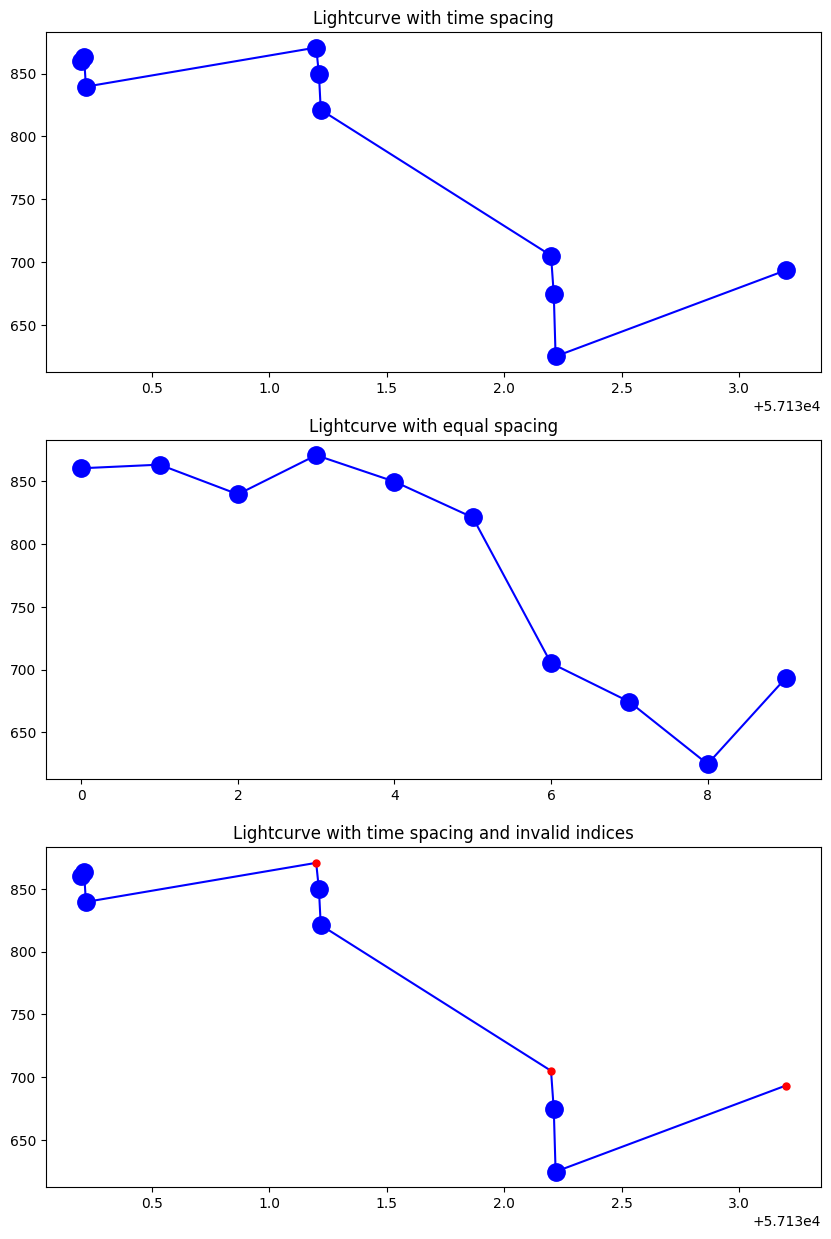

In [6]:
fig1 = plt.figure(figsize=(10, 15))
(ax1, ax2, ax3) = fig1.subplots(3, 1)

ResultsVisualizer.plot_time_series(
    row0.light_curve, times=results.all_times, axes=ax1, title="Lightcurve with time spacing"
)

ResultsVisualizer.plot_time_series(row0.light_curve, axes=ax2, title="Lightcurve with equal spacing")

ResultsVisualizer.plot_time_series(
    row0.light_curve,
    times=results.all_times,
    indices=[0, 1, 2, 4, 5, 7, 8],
    axes=ax3,
    title="Lightcurve with time spacing and invalid indices",
)

Or we can put it altogether with the `plot_result_row` function.

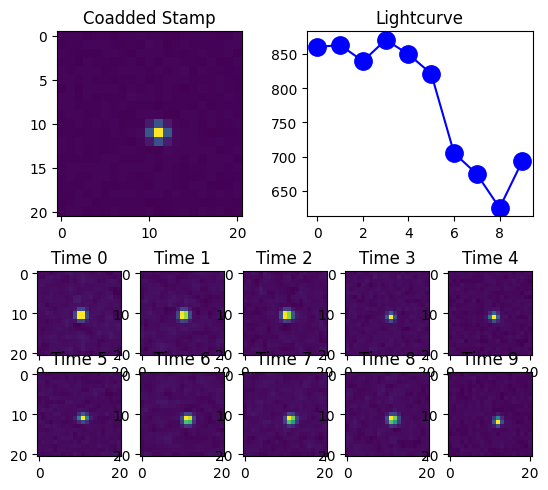

In [7]:
ResultsVisualizer.plot_result_row(row0)

## Generate the On-sky Positions

In order to generate the on-sky positions, we need the WCS file for the images. We first load the image meta-data for all the files and the time stamps for the images using the `ImageInfoSet` class. Typically the time stamps will either come from the FITS files themselves or from an auxiliary file (as shown below). We could also reuse the time stamps from the `ResultList` above.

In [8]:
img_dir = "../data/demo"
file_names = [f"{img_dir}/{f}" for f in sorted(os.listdir(img_dir))]

img_info = ImageInfoSet()
img_info.load_image_info_from_files(file_names, visit_in_filename=[0, 6])
print(f"Loaded data for {img_info.num_images} images.")

img_info.load_times_from_file("../data/demo_times.dat")
print(f"Using times: {img_info.get_all_mjd()}")

Loaded data for 10 images.
Using times: [57130.2, 57130.21, 57130.22, 57131.2, 57131.21, 57131.22, 57132.2, 57132.21, 57132.22, 57133.2]


We retrieve the first trajectory from the `ResultRow`.

In [9]:
trj0 = row0.trajectory
print(f"Finding positions of trajectory {trj0}")

Finding positions of trajectory lh: 243.354874 flux: 780.256409 x: 106 y: 44 x_v: 9.513972 y_v: -0.432751 obs_count: 10


We can then use the image information to compute the trajectory's coordinates on the sky.

In [10]:
sky_pos = img_info.trajectory_to_skycoords(trj0)
for i, pos in enumerate(sky_pos):
    print(f"{i}: ({pos.ra.degree}, {pos.dec.degree})")

0: (200.46750444773153, -7.720836307744057)
1: (200.46750411474895, -7.720843252864124)
2: (200.46750378176637, -7.72085019798419)
3: (200.46747114941977, -7.7215308197582795)
4: (200.46747081643608, -7.721537764878495)
5: (200.4674704834524, -7.721544709998717)
6: (200.46743785099767, -7.7222253317876435)
7: (200.4674375180129, -7.722232276908018)
8: (200.4674371850281, -7.722239222028387)
9: (200.4674045524653, -7.72291984383197)
